In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Cleaned Data)
covid = "covid-clinical-trial_data_cleandata.csv"

# Read File and store into Pandas data frame
covid_df = pd.read_csv(covid)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

covid_df.head()




,Rank,NCT_Number,Title,Status,Study_Results,Conditions,Interventions,Outcome_Measures,Gender,Age,Phases,Enrollment,Funded_Bys,Study_Type,Start_Date,Completion_Date,First_Posted,Locations,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,6/1/2020,1/22/2021,6/11/2020,United States,NaN
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,7/21/2020,10/13/2020,6/30/2020,United Kingdom,0.4891
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,5/22/2020,12/23/2020,6/24/2020,Spain,NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,4/20/2020,7/16/2020,4/21/2020,Portugal,NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,9/29/2020,4/15/2021,10/8/2020,Pakistan,NaN


In [3]:
covid_df.count()

Rank                1123
NCT_Number          1123
Title               1123
Status              1123
Study_Results       1123
Conditions          1123
Interventions        932
Outcome_Measures    1123
Gender              1116
Age                 1123
Phases               511
Enrollment          1123
Funded_Bys          1123
Study_Type          1123
Start_Date          1123
Completion_Date     1123
First_Posted        1123
Locations           1120
p-values              13
dtype: int64

In [6]:
total_nct_numbers = covid_df['NCT_Number'].count()

covid_df.Start_Date = pd.to_datetime(covid_df.Start_Date)
date_sort = covid_df.sort_values(by = 'Start_Date', ascending = True)


covid_df.Completion_Date = pd.to_datetime(covid_df.Completion_Date)
covid_df.First_Posted = pd.to_datetime(covid_df.First_Posted)

new_covid_df = date_sort[date_sort['Start_Date'] > '2018']

grouped_by_month = %timeit -n 10 -r 7 covid_df.groupby(covid_df['Start_Date'].dt.month)['NCT_Number'].sum()
ordered_dates = date_sort.head(20)
top_total = ordered_dates['Start_Date'].count()

new_covid_df


4.35 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


,Rank,NCT_Number,Title,Status,Study_Results,Conditions,Interventions,Outcome_Measures,Gender,Age,Phases,Enrollment,Funded_Bys,Study_Type,Start_Date,Completion_Date,First_Posted,Locations,p-values
1092,1093,NCT04475913,Digital vs Analog Impression in Cases of All-o...,Completed,No Results Available,Edentulous Mouth,Other: DIG Axial|Other: DIG Tilted|Other: CIG ...,implant loss|crestal bone loss,All,"50 Years to 65 Years (Adult, Older Adult)",Not Applicable,56,Other,Interventional,2018-07-11,2020-08-20,2020-07-17,Egypt,NaN
957,958,NCT04380766,Covid-19 Pandemic and Pancreatic Surgery in Italy,Completed,No Results Available,Pancreatic Cancer,Procedure: Evaluation of changes in the diagno...,Changes in pancreatic cancer management during...,All,"18 Years and older (Adult, Older Adult)",NaN,730,Other,Observational,2019-01-01,2020-07-31,2020-05-08,Italy,NaN
1090,1091,NCT04435028,Ketotifen: as a Cardioprotective Agent in Brea...,Completed,No Results Available,Breast Cancer|Iron Chelation,Drug: Ketotifen 1 MG,prophylaxis effect of Ketotifen on patient's h...,Female,30 Years to 60 Years (Adult),NaN,111,Other,Observational,2019-01-14,2019-08-13,2020-06-17,Egypt,NaN
1016,1017,NCT04815135,Effect of Covid-19 Pandemic on Emergency Surge...,Completed,No Results Available,Emergencies,Other: Observational study,Average duration of sx prior to admission in h...,All,"Child, Adult, Older Adult",NaN,344,Other,Observational,2019-03-01,2021-01-18,2021-03-24,Jordan,NaN
793,794,NCT04686708,COVID-19 Pandemic and General Surgery Emergencies,Completed,No Results Available,Emergencies,Other: Emergency general surgical admissions,Incidence of general surgical emergencies|Comp...,All,"18 Years and older (Adult, Older Adult)",NaN,750,Other,Observational,2019-03-11,2020-09-11,2020-12-29,Turkey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,NCT04824625,Incidence of Infection Reported by COVID-19 in...,Completed,No Results Available,Covid-19 (SARS-CoV-2),NaN,Incidence rate of people with SARS-CoV-2|Incid...,All,"18 Years to 65 Years (Adult, Older Adult)",NaN,5000,Other,Observational,2021-03-27,2021-04-10,2021-04-01,Spain,NaN
945,946,NCT04665960,Infection Control for Severe Acute Respiratory...,Completed,No Results Available,Covid19|SARS-CoV Infection|SARS Pneumonia|Coro...,NaN,Consensus using participating experts opinions.,All,"25 Years to 70 Years (Adult, Older Adult)",NaN,35,Other,Observational,2021-03-29,2021-05-01,2020-12-14,United Arab Emirates,NaN
27,28,NCT04832061,Respiratory Supports and COVID-19 Mortality,Completed,No Results Available,COVID-19,Other: Respiratory supports,rate of in-hospital mortality|rate of escalati...,All,"18 Years and older (Adult, Older Adult)",NaN,2300,Other,Observational,2021-04-01,2021-04-20,2021-04-05,United States,NaN
628,629,NCT04813770,The Impact of Theory-based Messaging on Covid-...,Completed,No Results Available,Vaccination|Covid19,Behavioral: Theory-based messages|Behavioral: ...,Covid-19 vaccination intention measured by a s...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,1113,Other,Interventional,2021-04-06,2021-04-26,2021-03-24,United Kingdom,NaN


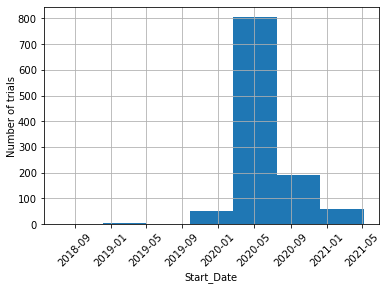

In [21]:
values = np.append(ordered_dates['Start_Date'].to_numpy(),covid_df.Start_Date)
labels = np.append(ordered_dates['Start_Date'].to_numpy(),covid_df.Start_Date)

figure, axes = plt.subplots()
new_covid_df.Start_Date.hist(bins= 7, ax=axes)

figure.text(0.04, 0.5, 'Number of trials',
            va='center', rotation='vertical')
plt.xticks(rotation = '45') 
plt.xlabel('Start_Date');

In [105]:
covid_df = covid_df[~covid_df["Interventions"].str.contains("Placebo", na=False)]
print (covid_df)

      Rank   NCT_Number                                              Title     Status         Study_Results                                         Conditions                                      Interventions                                   Outcome_Measures Gender                                          Age          Phases  Enrollment      Funded_Bys      Study_Type Start_Date Completion_Date First_Posted       Locations p-values
0        1  NCT04425538  A Phase 2 Trial of Infliximab in Coronavirus D...  Completed  No Results Available                                           COVID-19                                   Drug: Infliximab  Time to improvement in oxygenation|28-day mort...    All    18 Years and older   (Adult, Older Adult)         Phase 2          17       Other|NIH  Interventional 2020-06-01      2021-01-22   2020-06-11   United States      NaN
2        3  NCT04445272  Clinical Trial to Evaluate the Effectiveness a...  Completed  No Results Available                 

In [106]:
#Total count of Intverventiontyps
total_interventions = covid_df['Interventions'].count()

intervention_sort = covid_df.sort_values(by = 'Interventions', ascending = True)
ordered_intervention = intervention_sort.head(25)
top_total = intervention_sort['Interventions'].count()

ordered_values = set(map(lambda x:x[1], covid_df))
newlist = [[y[0] for y in covid_df if y[1]==x] for x in intervention_sort]

ordered_intervention

,Rank,NCT_Number,Title,Status,Study_Results,Conditions,Interventions,Outcome_Measures,Gender,Age,Phases,Enrollment,Funded_Bys,Study_Type,Start_Date,Completion_Date,First_Posted,Locations,p-values
1113,1114,NCT04871386,#Stayhealthy - Monitoring and Maintenance of M...,Completed,No Results Available,Mental Health Wellness 1,Behavioral: Acceptance and commitment therapy ...,General stress level (change from baseline/day...,All,"18 Years to 70 Years (Adult, Older Adult)",Not Applicable,138,Other,Interventional,2020-04-15,2020-05-18,2021-05-04,Germany,NaN
962,963,NCT04365335,Stress Biomarkers Leading to Professional Burn...,Completed,No Results Available,Occupational Stress,Behavioral: Assessment of work-related stress|...,Professional burnout|Mindfulness level|Perceiv...,All,18 Years to 60 Years (Adult),NaN,50,Other,Observational,2020-04-25,2020-06-12,2020-04-28,France,NaN
961,962,NCT04488796,STAND UP to SARS-CoV-2 (COVID-19): Using Behav...,Completed,No Results Available,Health Behaviour Change,Behavioral: Assigned Strategies: Opt-in|Behavi...,Change in sedentary behaviour break frequency|...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,148,Other,Interventional,2020-09-07,2020-12-16,2020-07-28,Canada,NaN
710,711,NCT04378452,Assessment of the Psycho-social Impact of COVI...,Completed,No Results Available,SARS-CoV 2|COVID-19|Quality of Life|Mental Hea...,Behavioral: COM-COVID anonimous survey,"Psychological impact of the outbreak, total sc...",All,"16 Years and older (Child, Adult, Older Adult)",NaN,56656,Other,Observational,2020-03-31,2021-04-07,2020-05-07,Spain,NaN
504,505,NCT04338945,Impact of Pandemic COVID-19 on Surgical Specia...,Completed,No Results Available,COVID,Behavioral: COVID-surgRES questionaire,Measure of the impact of COVID Emergency on su...,All,"18 Years and older (Adult, Older Adult)",NaN,800,Other,Observational,2020-03-15,2020-05-01,2020-04-08,Italy,NaN
1069,1070,NCT04370678,Changes in Preference for Surgery of Patients ...,Completed,No Results Available,Arthroscopy,Behavioral: Change in preference to surgery un...,Change in preference|Change in preference betw...,All,"18 Years and older (Adult, Older Adult)",NaN,79,Other,Observational,2020-04-17,2020-04-24,2020-05-01,Denmark,NaN
1083,1084,NCT04409496,Chat-based Support for Preventing Smoking Relapse,Completed,No Results Available,Smoking Cessation,Behavioral: Chat-based instant messaging suppo...,Biochemically-validated tobacco abstinence|Sel...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,108,Other,Interventional,2020-06-02,2021-01-22,2020-06-01,Hong Kong,NaN
404,405,NCT04421612,COVID-19 - No Health Without Mental Health,Completed,No Results Available,Covid19|Anxiety,Behavioral: Co-mestring (co-coping),The Patient Health Questionnaire|The Generaliz...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,91,Other,Interventional,2020-04-02,2021-01-01,2020-06-09,Norway,NaN
394,395,NCT04602351,Communication in ICU During COVID-19,Completed,No Results Available,COVID-19|Severe Acute Respiratory Syndrome Cor...,Behavioral: Communication,Changes in the pattern of family members visit...,All,"18 Years to 100 Years (Adult, Older Adult)",NaN,296,Other,Observational,2021-03-22,2021-05-01,2020-10-26,United Arab Emirates,NaN
922,923,NCT04459455,"Project H-COVID: Evaluating Hyper-Brief, Onlin...",Completed,No Results Available,Anxiety,Behavioral: Contain COVID Anxiety SSI|Behavior...,Change in Anxiety Control Questionnaire (ACQ) ...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,500,Other,Interventional,2020-08-19,2020-10-15,2020-07-07,United States,NaN


In [26]:
#columns to delete
remove_columns = covid_df.drop(columns=[])
remove_columns.head()

,Rank,NCT_Number,Title,Status,Study_Results,Conditions,Interventions,Outcome_Measures,Gender,Age,Phases,Enrollment,Funded_Bys,Study_Type,Start_Date,Completion_Date,First_Posted,Locations,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,6/1/2020,1/22/2021,6/11/2020,United States,NaN
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,5/22/2020,12/23/2020,6/24/2020,Spain,NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,4/20/2020,7/16/2020,4/21/2020,Portugal,NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,9/29/2020,4/15/2021,10/8/2020,Pakistan,NaN
5,6,NCT04466644,COVID-19: A Prevalence Study of Two ART Centre...,Completed,No Results Available,COVID-19,Diagnostic Test: ELISA|Diagnostic Test: RT-PCR,Prevalence of contagiousness in asymptomatic i...,All,"18 Years and older (Adult, Older Adult)",NaN,340,Industry,Observational,6/8/2020,8/25/2020,7/10/2020,United States,NaN


In [27]:
#update locations to countries
remove_columns['Interventions'] = remove_columns['Interventions'].str.rsplit(':').str[0]
remove_columns.head()

,Rank,NCT_Number,Title,Status,Study_Results,Conditions,Interventions,Outcome_Measures,Gender,Age,Phases,Enrollment,Funded_Bys,Study_Type,Start_Date,Completion_Date,First_Posted,Locations,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,6/1/2020,1/22/2021,6/11/2020,United States,NaN
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,5/22/2020,12/23/2020,6/24/2020,Spain,NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,4/20/2020,7/16/2020,4/21/2020,Portugal,NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,9/29/2020,4/15/2021,10/8/2020,Pakistan,NaN
5,6,NCT04466644,COVID-19: A Prevalence Study of Two ART Centre...,Completed,No Results Available,COVID-19,Diagnostic Test,Prevalence of contagiousness in asymptomatic i...,All,"18 Years and older (Adult, Older Adult)",NaN,340,Industry,Observational,6/8/2020,8/25/2020,7/10/2020,United States,NaN


In [107]:
treatment = remove_columns[['Interventions', 'Enrollment']]

treatment_group = treatment.groupby('Interventions')

treatment_group.size()

Interventions
Behavioral              84
Biological              51
Combination Product      6
Device                  66
Diagnostic Test        112
Dietary Supplement      11
Drug                   174
Other                  278
Procedure               37
Radiation                3
dtype: int64

In [108]:
total_interventions = treatment_group.count()

total_interventions.sort_index().head()

,Enrollment
Interventions,
Behavioral,84
Biological,51
Combination Product,6
Device,66
Diagnostic Test,112


The mean number of treatments is 82.2


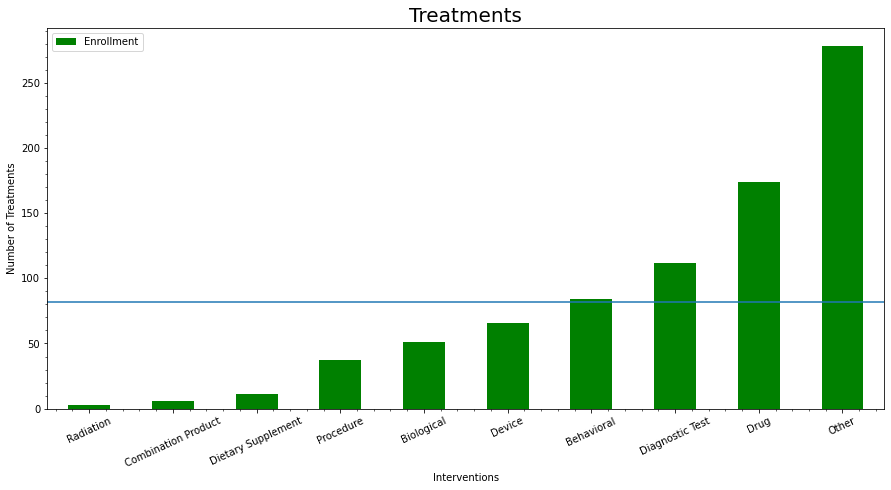

In [28]:
fig,ax= plt.subplots()

total_interventions.sort_values('Enrollment').plot(kind="bar", ax=ax, color='g',figsize=(15,7))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Interventions")
ax.set_ylabel("Number of Treatments")
ax.set_title(("Treatments"), fontsize=20)
plt.xticks(rotation = '25') 
# use axhline
mean = total_interventions["Enrollment"].mean()
ax.axhline(mean)

print(f"The mean number of treatments is {mean}")
